In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import gsw
import numpy as np
import glob
import os

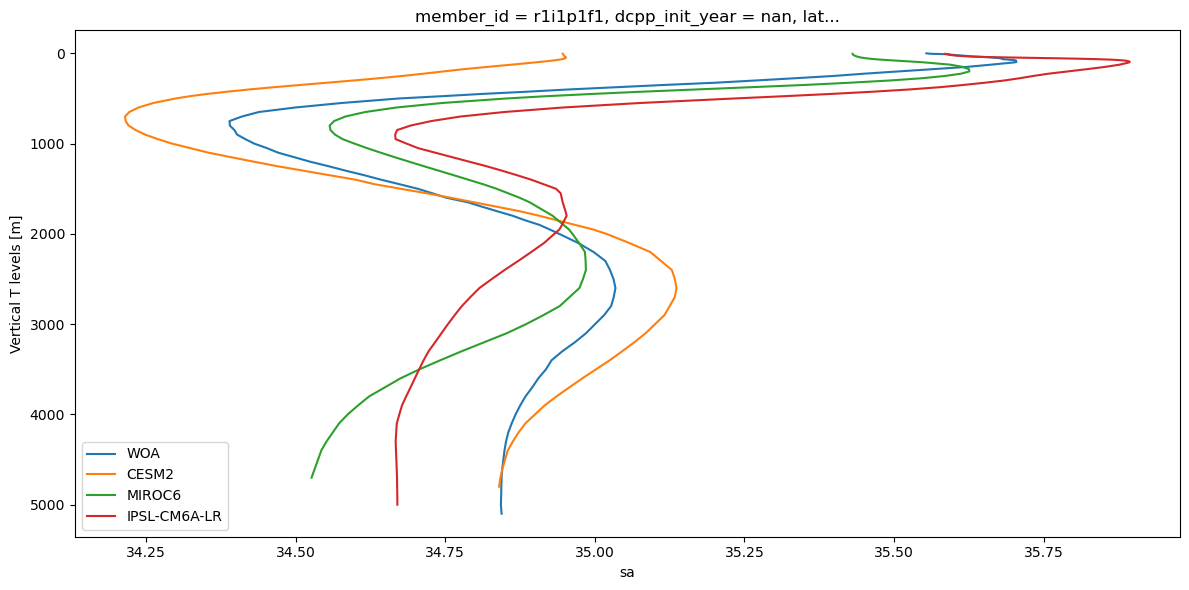

In [3]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Abre o conjunto de dados WOA
    woa_ds = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc", 
                             decode_times=False)  # Substitua pelo caminho real do seu arquivo WOA

    # Inicializa uma figura com subplots
    fig, axs = plt.subplots(nrows=1, figsize=(12, 6))

    # Plota a média zonal do WOA no primeiro eixo
    woa_ds.sel(lat=-38, method="nearest").s_an.plot(ax=axs, label='WOA', y="depth")

    # Loop através dos arquivos
    for i, arquivo in enumerate(arquivos):
        # Abre o conjunto de dados
        ds = xr.open_dataset(arquivo)

        # Obtém o nome do modelo a partir do nome do arquivo
        modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

        # Calcula a média zonal
        zonal = ds.sel(time=slice("1955", "2014")).mean(dim="time")
        
        # Plota a média zonal do modelo atual no mesmo eixo
        zonal.sel(lat=-38, method="nearest").sa.plot(ax=axs, label=modelo,  y="lev")

        ds.close()

    # Adiciona a legenda
    axs.legend()

    # Ajusta o layout
    plt.tight_layout()

    # Inverte o eixo y no último eixo
    axs.invert_yaxis()

    # Salva a figura
    plt.savefig('Figuras/Salinidade_Modelos_com_WOA.png', bbox_inches='tight')

    # Mostra a figura (opcional)
    plt.show()
    
    # Fecha o conjunto de dados WOA
    woa_ds.close()


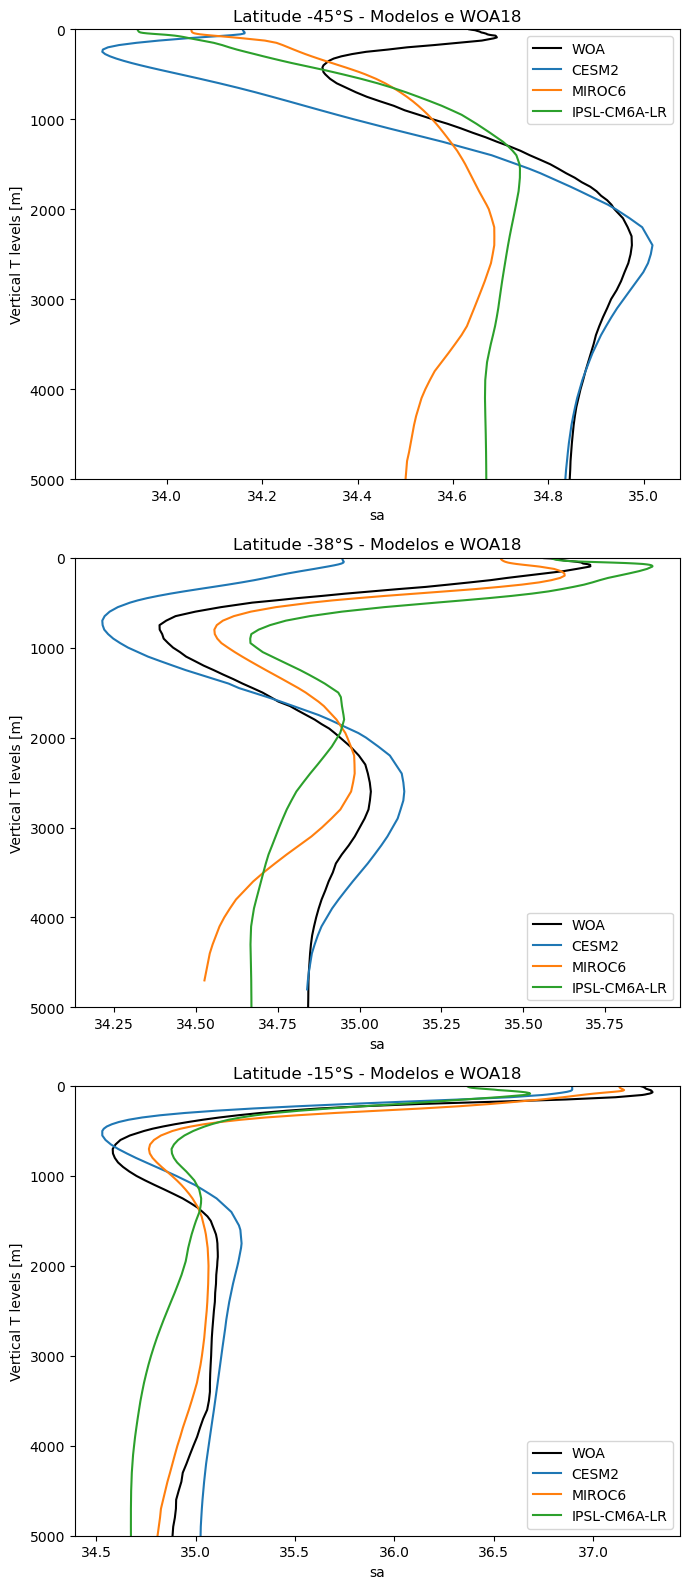

In [20]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Abre o conjunto de dados WOA
    woa_ds = xr.open_dataset("/Users/schimidel/Documents/Pastas_Iniciação/Tendências_WOA/woa_mean.nc", 
                             decode_times=False)  # Substitua pelo caminho real do seu arquivo WOA

    # Lista de latitudes desejadas
    latitudes = [-45, -38, -15]
    
    # Inicializa uma nova figura
    fig, axs = plt.subplots(nrows=3, figsize=(7, 16))
   
    # Loop através das latitudes
    for lat in latitudes:
        
        # Plota a média zonal do WOA para a latitude atual (Salinidade)
        woa_ds.sel(lat=lat, method="nearest").s_an.plot(ax=axs[latitudes.index(lat)], label='WOA', y="depth", color="black")

        # Loop através dos arquivos
        for i, arquivo in enumerate(arquivos):
            # Abre o conjunto de dados
            ds = xr.open_dataset(arquivo)

            # Obtém o nome do modelo a partir do nome do arquivo
            modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

            # Calcula a média zonal (Salinidade)
            zonal_sal = ds.sel(time=slice("1955", "2014")).mean(dim="time")
            
            # Plota a média zonal do modelo atual no mesmo eixo (Salinidade)
            zonal_sal.sel(lat=lat, method="nearest").sa.plot(ax=axs[latitudes.index(lat)], label=modelo, y="lev")

            ds.close()
        
        axs[latitudes.index(lat)].set_ylim(0, 5000)
        # Adiciona um título ao eixo
        axs[latitudes.index(lat)].set_title(f"Latitude {lat}°S - Modelos e WOA18")
    # Adiciona a legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    # Ajusta o layout
    plt.tight_layout()

    # Inverte o eixo y no último eixo
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()


    # Salva a figura
    plt.savefig(f'Figuras/Salinidade_Perfil_Vertical_Modelos_com_WOA_{lat}S.png', bbox_inches='tight')

    # Mostra a figura (opcional)
    plt.show()

    # Fecha o conjunto de dados WOA
    woa_ds.close()


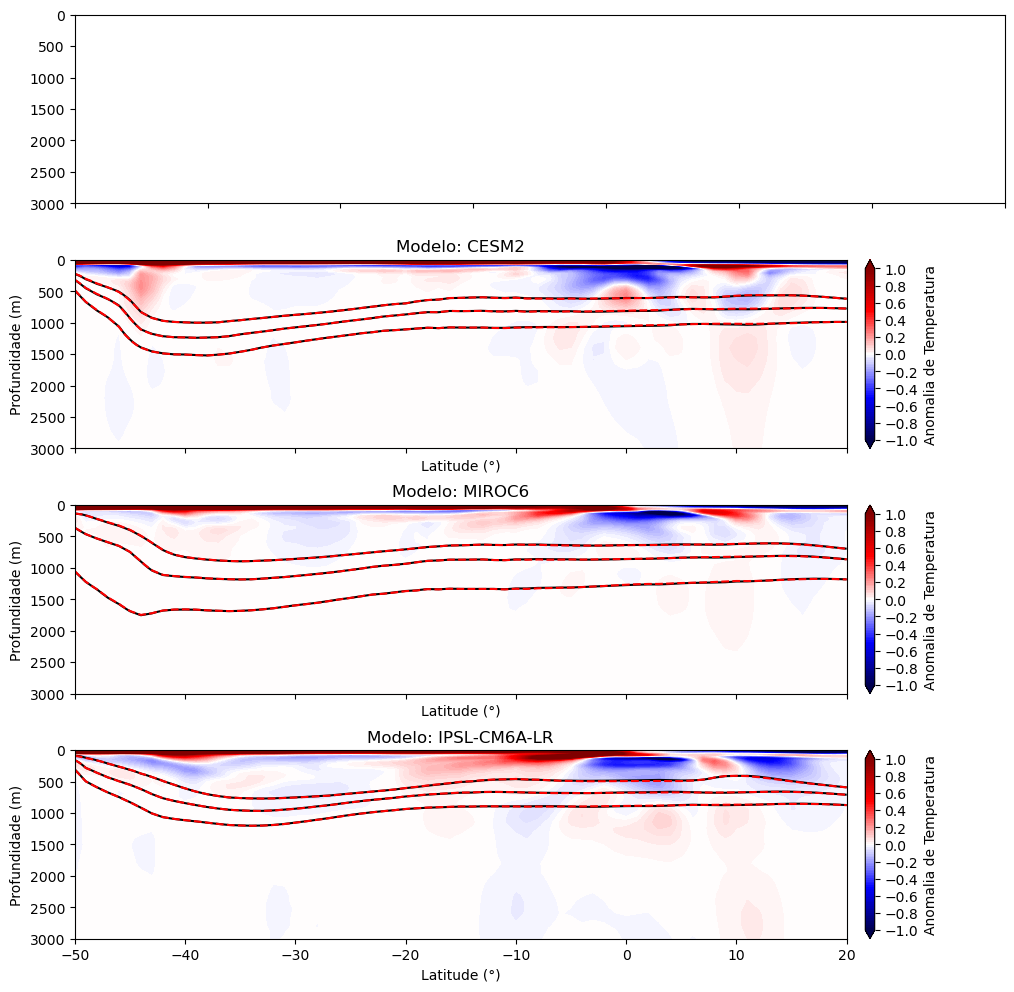

In [27]:
import gsw
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glob
import os

# Obtém o diretório atual onde está o notebook
pasta_atual = os.path.dirname(os.path.abspath('__file__'))

# Usa a biblioteca glob para obter todos os arquivos NetCDF na pasta
arquivos = glob.glob(os.path.join(pasta_atual, '*.nc'))

# Filtra os arquivos para incluir apenas aqueles com "historical" no nome
arquivos = [arquivo for arquivo in arquivos if "historical" in arquivo]

# Verifica se existem arquivos para processar
if not arquivos:
    print("Nenhum arquivo 'historical' encontrado na pasta.")
else:
    # Cria a figura com espaçamento vertical entre os subplots
    fig, axs = plt.subplots(len(arquivos) + 1, figsize=(12, 3 * (len(arquivos) + 1)), sharex=True, sharey=True,
                            gridspec_kw={'hspace': 0.3})

    # Loop através dos arquivos
    for i, arquivo in enumerate(arquivos):

        if "historical" in arquivo:
            # Abre o conjunto de dados
            ds = xr.open_dataset(arquivo)

            # Obtém o nome do modelo a partir do nome do arquivo
            modelo = os.path.basename(arquivo).split(".")[2]  # Ajuste isso conforme a estrutura dos seus nomes de arquivo

            # Calcula a média zonal dos meses de inverno
            zonal_winter = ds.sel(time=ds['time.month'].isin([1, 2, 3])).mean(dim="time")
            zonal_winter["sigma0"] = gsw.sigma0(zonal_winter["sa"], zonal_winter["thetao"])

            # Calcula a média zonal anual
            zonal_annual = ds.mean(dim="time")
            zonal_annual["sigma0"] = gsw.sigma0(zonal_annual["sa"], zonal_annual["thetao"])

            diff = zonal_winter - zonal_annual

            # Adiciona o subplot correspondente
            ax = axs[i + 1]

            # Faz o plot
            contour = diff.thetao.plot.contourf(ax=ax, x="lat", levels=100, cmap="seismic", add_colorbar=False,
                                                vmin=-1, vmax=1)

            # Aplicar máscara para sigma0 > 26.4
            masked_winter_sigma0 = zonal_winter.sigma0.where(zonal_winter.sigma0 > 26.4)
            masked_annual_sigma0 = zonal_annual.sigma0.where(zonal_annual.sigma0 > 26.4)

            # Converter os dados do xarray em numpy
            contour_data = masked_winter_sigma0.values
            lat_values = masked_winter_sigma0.lat.values

            # Usar o contour do Matplotlib
            contour_lines = ax.contour(lat_values, masked_winter_sigma0.lev, contour_data, levels=[27, 27.2, 27.4],
                                       colors='black', linestyles="solid")

            # Converter os dados do xarray em numpy
            contour_data = masked_annual_sigma0.values
            lat_values = masked_annual_sigma0.lat.values

            # Usar o contour do Matplotlib
            contour_lines = ax.contour(lat_values, masked_annual_sigma0.lev, contour_data, levels=[27, 27.2, 27.4],
                                       colors='red', linestyles="dashed")

            ax.set_ylim(0, 3000)
            ax.invert_yaxis()
            ax.set_title(f"Modelo: {modelo}")

            # Adicionando rótulos aos eixos X e Y
            ax.set_xlabel('Latitude (°)')
            ax.set_ylabel('Profundidade (m)')

            # Adiciona a colorbar manualmente para o último subplot
            cbar = plt.colorbar(contour, ax=axs[i + 1], orientation='vertical', pad=0.02)
            cbar.set_ticks(np.arange(-1, 1.1, 0.2))  # Ajuste os ticks conforme necessário
            cbar.set_label('Anomalia de Temperatura')
            # Fecha o conjunto de dados
            ds.close()

    plt.savefig("Figuras/Anomalias_Modelos_WOA_Temperatura.png")
    plt.show()
